<a href="https://colab.research.google.com/github/gdomingosg/Desafio_Cientista_de_Dados/blob/main/Desafio_Lighthouse_Cientista_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Desafio Cientista de Dados</center>

---







## Desafio

O objetivo é prever o churn (abandono de clientes) de um banco de dados fictício de uma instituição financeira. Para isso são fornecidos dois datasets: um dataset chamado Abandono_clientes composto por 10000 linhas e 13 colunas de informação (features), sendo uma coluna “Exited” composta por dados binários: 1 se o cliente abandonou o banco, 0 se não.  O segundo dataset possui 1000 linhas e 12 colunas e não possui a coluna “Exited”. **Seu objetivo é prever essa coluna a partir dos dados enviados e nos enviar para avaliação dos resultados.**

### Transformação, limpeza e identificação dos dados

In [2]:
!pip install scikit-plot -q

In [3]:
!pip install scikit-optimize -q

     |████████████████████████████████| 100 kB 3.9 MB/s 


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import scikitplot as skplt

# Importando os dados do repositório do github
url_clientes = 'https://raw.githubusercontent.com/gdomingosg/Desafio_Cientista_de_Dados/main/Abandono_clientes.csv'
df = pd.read_csv(url_clientes)

# Visualizar as 5 primeiras linhas da tabela de dados
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Inicialmente vamos identificar o tipo de dado de cada coluna e verificar se bate com as informações que temos acima.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


De inicio é identificado que o número de colunas da tabela está diferente do indicado no desafio, pois temos a coluna RowNumber. Todas as colunas parecem estar com o tipo de dado correto, e parecem possuir as 10000 entradas, conforme especificado no desafio, mas vamos verificar se existe algum dado invalido nas colunas.


In [6]:
# Atribuir a coluna RowNumber com index
df.set_index('RowNumber', inplace=True)

df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Como todas as colunas retornaram 0, indicando que nenhuma variável apresenta dados faltantes.

Agora vamos verificar a quantidade de valores unicos por colunas, pra entender se as colunas HasCrCard, IsActiveMember e Exited possuem apenas os valores 0 e 1 para que as mesmas sejam tratadas como boolean.

In [8]:
# Verificando a quantidade de valores únicos por coluna
for col in df.columns:
  print(f'{col}: {df[col].nunique()}')

CustomerId: 10000
Surname: 2932
CreditScore: 460
Geography: 3
Gender: 2
Age: 70
Tenure: 11
Balance: 6382
NumOfProducts: 4
HasCrCard: 2
IsActiveMember: 2
EstimatedSalary: 9999
Exited: 2


Conforme esperado, as colunas  HasCrCard, IsActiveMember e Exited podem ser tratadas como bool.
Além disso, a coluna CustomerId possui 10000 valores diferentes, indicando que não existem dados repetidos de clientes.

Como não temos mais interesse em quem é o cliente, a coluna CustomerId e Surname podem ser exluidas


In [9]:
df.drop(columns=['CustomerId', 'Surname'], inplace=True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


---
#Entregas

A partir de agora podemos começar a reponder a pergunta número um da entrega:


## Pergunta 1

* Descreva graficamente os dados disponíveis;
* Apresente as principais estatísticas descritivas;
* *Comente* o porquê da escolha dessas estatísticas.

Inicialmente utilizaremos o método `describe()` para gerar um resumo estatistico das colunas numéricas, contudo, vamos remover as colunas HasCrCard, IsActiveMember e Exited, pois são valores booleanos.

In [11]:
col_excluir = ['HasCrCard', 'IsActiveMember', 'Exited']
df.drop(col_excluir, axis=1).describe().round(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,650.5,38.9,5.0,76485.9,1.5,100090.2
std,96.7,10.5,2.9,62397.4,0.6,57510.5
min,350.0,18.0,0.0,0.0,1.0,11.6
25%,584.0,32.0,3.0,0.0,1.0,51002.1
50%,652.0,37.0,5.0,97198.5,1.0,100193.9
75%,718.0,44.0,7.0,127644.2,2.0,149388.2
max,850.0,92.0,10.0,250898.1,4.0,199992.5


também podemos verificar a taxa de churn dos clientes e o total de membros ativos.

In [12]:
total_linhas = df.shape[0]

churn = df[df['Exited'] == 1].shape[0]
total_churn = round((churn/total_linhas)*100, 1)

active_member = df[df['IsActiveMember'] == 1].shape[0]
total_active = round((active_member/total_linhas)*100, 1)

print(f'Total de Churn: {total_churn}%')
print(f'Total de membros ativos: {total_active}%')

Total de Churn: 20.4%
Total de membros ativos: 51.5%


### Caracteristicas gerais dos clientes

Por meio da descrição dos dados acima podemos identificar algumas caracteristicas dos clientes dessa empresa, sendo elas:


* Possuem pontuação de crédito média de 650;  
* Possuem idade média de 39 anos, sendo o mais novo com 18 e o mais velho com 92;
* Possuem um classificação média de estabilidade no emprego de 5 pontos;
* Média de 76 mil em conta e um salario médio anual estimado em 100 mil;
* Em média os clientes possuem cerca de 1,5 produtos da empresa;
* Existe uma taxa de abandono de 20,4% dos clientes;
* Apenas 51,5% dos clientes são ativos.



### Histogramas e caracteristicas específicas

As médias e medianas de cada coluna parecem possuir valores semelhantes o que indica uma possível distribuição dos dados próxima a normal, sem muitos outliers. Plotaremos os histogramas das colunas para verificar o comportamento dos dados e obter mais algumas informações a respeito.

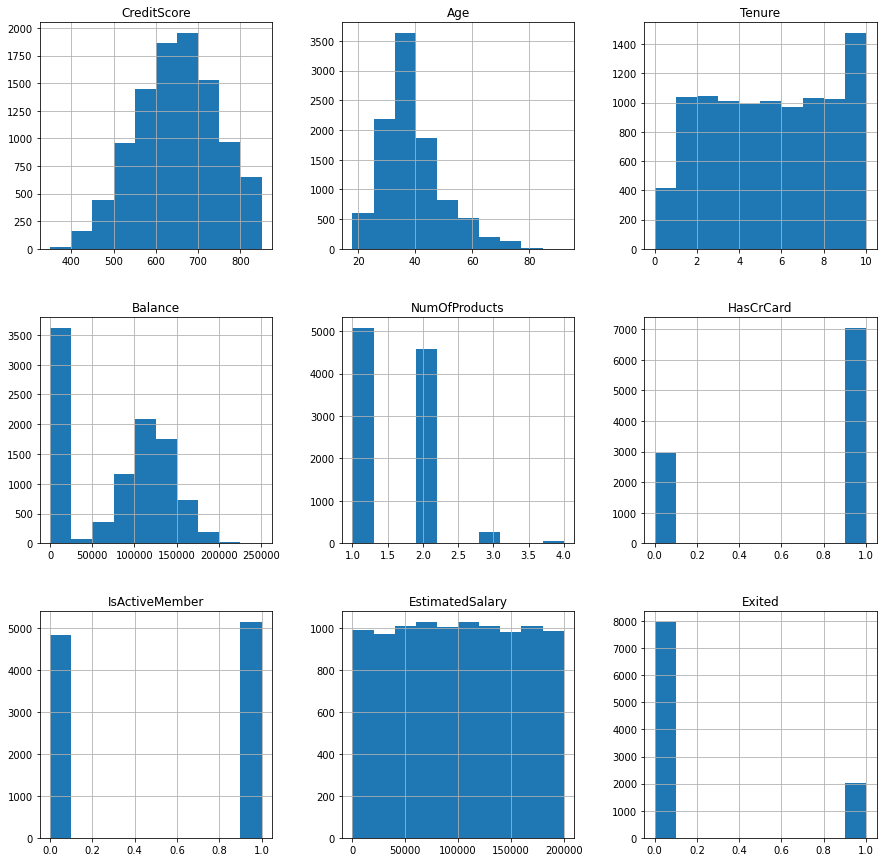

In [13]:
#Histogramas com o número de clientes representado no eixo y e a variável representada no eixo x
df.hist(figsize=(15, 15), bins=10);

A partir dos histogramas podemos estimar mais algumas informações a repeito dos clientes:
* A distribuição de idade indica que a maioria dos clientes tem idade entre 30 e 40 anos;
* A distribuição de Balance indica uma grande quantidade de clientes com menos de 25 mil na conta;
* A maioria dos clientes possui cartão de crédito;
* E a maioria dos clientes possui 1 ou 2 produtos.

---


### Perfil dos clientes que deixaram a empresa

Agora vamos estudar o perfil dos clientes que deixaram a empresa e procurar por caracteristicas que permitam a classificação dos mesmo. 
Começaremos gerando gráficos de barras das variáveis categóricas dos clientes que deixaram a empresa.
Em seguida partiremos para os gráficos  das variáveis numéricas, para as quais serão utilizados 3 tipos de gráficos:
* Barras, para variáveis com poucos valores;
* Boxplots, para identificar padrões entre os clientes que deixaram ou não a empresa;
* Dispersão, para encontrar padrões entre a taxa de churn e determinada variável.

#### Variáveis Categóricas

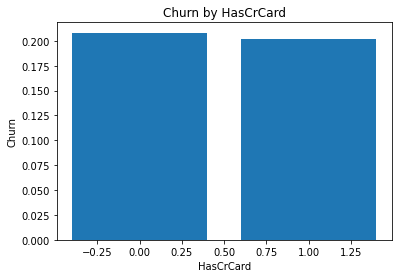

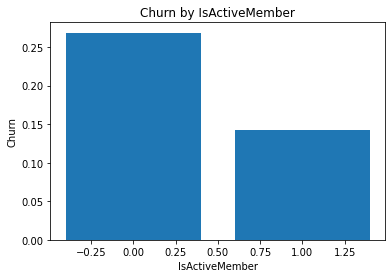

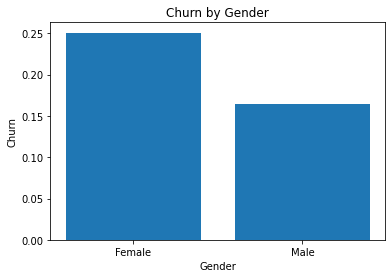

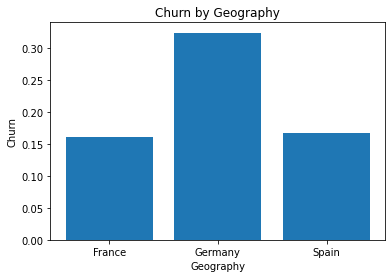

In [14]:
# Gráfico das variáveis categóricas em função da coluna Exited
col_categoricos = ['HasCrCard', 'IsActiveMember', 'Gender', 'Geography']

for col in col_categoricos:
  df_mean_exited = df.groupby(col).Exited.mean().reset_index()
  plt.figure(figsize=(6, 4));
  plt.bar(df_mean_exited[col], df_mean_exited['Exited']);
  plt.title(f'Churn by {col}');
  plt.xlabel(col);
  plt.ylabel('Churn');
  plt.show()

Os gráficos de HasCrCard e IsActiveMember devem ser considerados apenas os valores 0 e 1 do eixo X, os demais valores devem ser desconsiderados.

A partir do gráficos das variáveis categóricas é possível obter algumas conclusões:

* Ter ou não crédito não influencia muito na tomada de decisão para deixar a empresa;
* Membros com as contas desativadas apresentam maior probabilidade de desistir da empresa;
* As mulheres apresentam maior probabilidade de largar a empresa;
* A Alemanha é o pais com a maior quantidade de clientes que abandonaram a empresa.



#### Variáveis numéricas



##### Boxplot

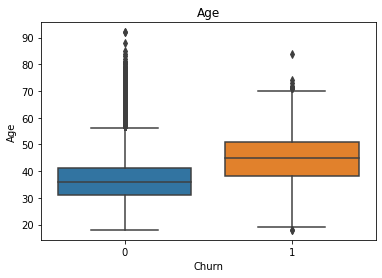

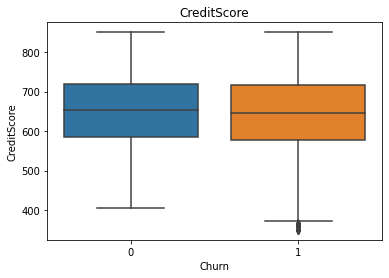

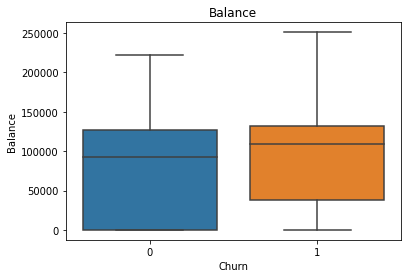

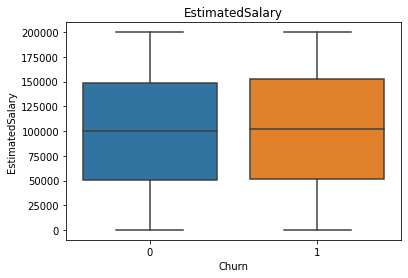

In [15]:
# Boxplots
import seaborn as sns
col_numericos_box = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']

for col in col_numericos_box:
  plt.figure(figsize=(6, 4));
  sns.boxplot(x='Exited', y=col, data=df);
  plt.title(f'{col}');
  plt.ylabel(col);
  plt.xlabel('Churn');
  plt.show()

Algumas informações interessantes:
* A grande quantidade de outliers presente no gráfico de idade para pessoas que não abandonaram a empresa, indica que clientes com mais idade têm menos chances de abandonar a empresa;
* Clientes com mediana de idade de 45 anos, tem maior probabilidade de sair da empresa;
* A variável de pontuação de crédito não aparece influenciar na taxa de churn da empresa, uma vez que seus boxplot são visualmente semelhantes;
* O boxplot dos clientes que abandonaram a empresa no gráfico de pontuação de crédito possui outliers para pontuações baixas, indicando que a baixa pontuação de crédito talvez leve as pessoas a abandonarem a empresa.
* A estimativa de salário não parece afetar o churn;
* Clientes que abandonaram a empresa, possuem maior mediana de Saldo.


Perguntas a reponder:
* Os clientes com mais idade são ativos e possuem saldo?


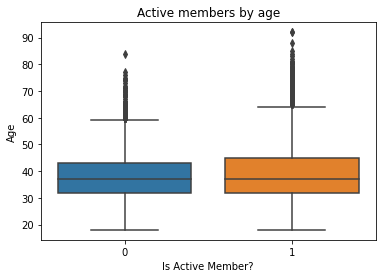

In [16]:
plt.figure(figsize=(6, 4));
sns.boxplot(x='IsActiveMember', y='Age', data=df);
plt.title(f'Active members by age');
plt.ylabel('Age');
plt.xlabel('Is Active Member?');
plt.show()

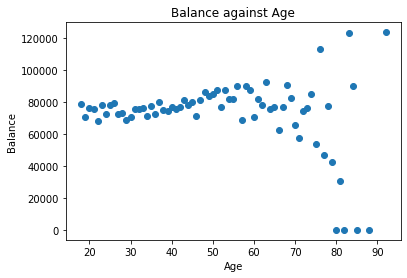

In [17]:
df_balance_age = df.groupby('Age').Balance.mean().reset_index()
plt.figure(figsize=(6, 4));
plt.scatter(df_balance_age['Age'], df_balance_age['Balance']);
plt.title(f'Balance against Age');
plt.xlabel('Age');
plt.ylabel('Balance');
plt.show()

De acordo com os dois gráficos acima, as pessoas com mais idade são, em sua maioria, membros ativos, contudo, parecem possuir majoritariamente valores mais baixos de saldo.

##### Dispersão

Serão plotados os gráficos de churn against Age e Churn against CreditScore.
Os gráfico de EstimatedSalary e Balance não serão plotados pois como vistos anteriormente, possuem muitos valores unicos, não sendo interesante utilizar valores médios para identificar a taxa de churn desses itens.

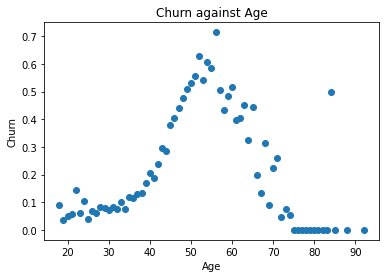

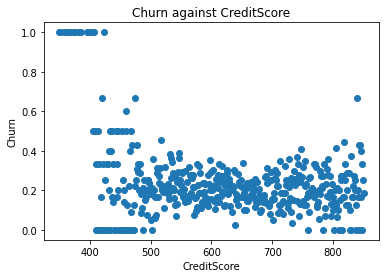

In [18]:
# Graficos de dispersão para as variáveis com muitos valores (Age, CreditScore, Balance, EstimatedSalary)
col_numericos_disp = ['Age', 'CreditScore']

for col in col_numericos_disp:
  df_numericos_disp = df.groupby(col).Exited.mean().reset_index()
  plt.figure(figsize=(6, 4));
  plt.scatter(df_numericos_disp[col], df_numericos_disp['Exited']);
  plt.title(f'Churn against {col}');
  plt.xlabel(col);
  plt.ylabel('Churn');
  plt.show()

Os gráficos de dispersão indicam que:
* Clientes com idade entre 40 e 60 possuem maior taxa de churn que clientes com outras idades;
* Clientes com a menor pontuação de crédito são os mais proensos a abandonar a empresa.

##### Barras

O gráfico de barras será utilizado para apresentar os resultados das colunas Tenure	e	NumOfProducts, uma vez que estas estão divididas em categorias bem definidas

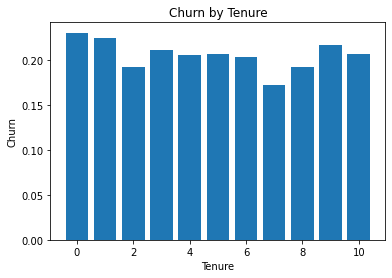

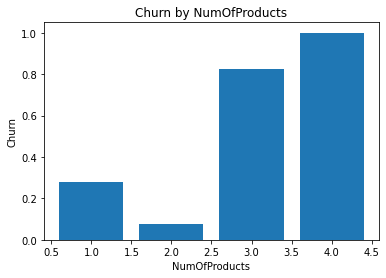

In [19]:
col_numericos_bar = ['Tenure', 'NumOfProducts']
  
for col in col_numericos_bar:
  df_plot = df.groupby(col).Exited.mean().reset_index()
  plt.figure(figsize=(6, 4));
  plt.bar(df_plot[col], df_plot['Exited']);
  plt.title(f'Churn by {col}');
  plt.xlabel(col);
  plt.ylabel('Churn');
  plt.show()

A partir desses gráficos de barra é possível obter algumas informações:
* Clientes com 3 ou 4 produtos possuem mais chance de abandonar a empresa;
* A estabilidade no emprego não parece ter muita relação com a taxa de Churn, ocorrendo apenas uma leve tendencia para pessoas com 0 ou 1 pontos de estabilidade terem mais chance de abandonar a empresa.

## Pergunta 2

* Explique como você faria a previsão do Churn a partir dos dados;
* Quais variáveis e/ou suas transformações você utilizou e por quê?;
* Qual tipo de problema estamos resolvendo (regressão, classificação)?;
* Qual modelo melhor se aproxima dos dados e quais seus prós e contras? 
* Qual medida de performance do modelo foi escolhida e por quê?

### Predição a partir dos dados

Para fazer a previsão do Churn a partir dos dados será utilizado um modelo de machine learning que é capaz de, a partir dos dados de entrada e de uma variável resposta, criar critérios que permitem a predição de novas respostas a partir das variáveis de entradas pré definidas



### Variáveis e transformações

Para não modificar os valores da variável resposta, devemos separar o dataframe:

* X = variáveis independentes;
* y = variável resposta.

Outras transformações necessárias de se realizar no DataFrame antes de aplicar o modelo, já foram realizadas no item Transformação, limpeza e identificação dos dados, no início deste notebook.



In [20]:
X = df.drop('Exited', axis=1)
y = df['Exited']
X.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
3,502,France,Female,42,8,159660.80,3,1,0,113931.57
4,699,France,Female,39,1,0.00,2,0,0,93826.63
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
6,645,Spain,Male,44,8,113755.78,2,1,0,149756.71
7,822,France,Male,50,7,0.00,2,1,1,10062.80
8,376,Germany,Female,29,4,115046.74,4,1,0,119346.88
9,501,France,Male,44,4,142051.07,2,0,1,74940.50


#### Tratando variáveis categóricas

Para aplicar os modelos de machine learning também é necessário atribuir valores numéricos a todas as colunas e transformar as colunas com variáveis categóricas em colunas com valores binários.

Como as colunas NumOfProducts e Geography possuem 3 valores diferentes na mesma coluna, será utilizada a função get_dummies do pandas, que cria uma nova coluna para cada categoria da coluna especificada, atribuindo o valor 1 para as entradas correspondentes aquela categoria e 0 para as outras.

In [21]:
X['Gender'] = X['Gender'].replace(['Female', 'Male'], [0, 1])

X_cat_tratados = pd.get_dummies(data=X, columns=['Geography', 'NumOfProducts'])
X_cat_tratados.head(10)

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
RowNumber,,,,,,,,,,,,,,,
1,619,0,42,2,0.00,1,1,101348.88,1,0,0,1,0,0,0
2,608,0,41,1,83807.86,0,1,112542.58,0,0,1,1,0,0,0
3,502,0,42,8,159660.80,1,0,113931.57,1,0,0,0,0,1,0
4,699,0,39,1,0.00,0,0,93826.63,1,0,0,0,1,0,0
5,850,0,43,2,125510.82,1,1,79084.10,0,0,1,1,0,0,0
6,645,1,44,8,113755.78,1,0,149756.71,0,0,1,0,1,0,0
7,822,1,50,7,0.00,1,1,10062.80,1,0,0,0,1,0,0
8,376,0,29,4,115046.74,1,0,119346.88,0,1,0,0,0,0,1
9,501,1,44,4,142051.07,0,1,74940.50,1,0,0,0,1,0,0


#### Tratando variáveis numéricas

https://medium.com/ipnet-growth-partner/padronizacao-normalizacao-dados-machine-learning-f8f29246c12

Apesas da variável Tenure ser categorica por possuir muitos valores, será tratada como numérica, e sofrerá as mesmas transformações.

Como a distribuição dos dados não é gaussiana para a maioria das variáveis e é distorcida da gaussiana para alguma delas, será realizada a normalização dos dados numéricos a partir da fórmula:

<center>Valor normalizado = (valor - minimo da coluna)/(maximo da coluna - minimo da coluna)</center>



In [22]:
col_numericos_box.append('Tenure')
col_numericos_box

['Age', 'CreditScore', 'Balance', 'EstimatedSalary', 'Tenure']

In [23]:
X_cat_tratados[col_numericos_box] = MinMaxScaler().fit_transform(X_cat_tratados[col_numericos_box])
X_tratados = X_cat_tratados
X_tratados

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
RowNumber,,,,,,,,,,,,,,,
1,0.538,0,0.324324,0.2,0.000000,1,1,0.506735,1,0,0,1,0,0,0
2,0.516,0,0.310811,0.1,0.334031,0,1,0.562709,0,0,1,1,0,0,0
3,0.304,0,0.324324,0.8,0.636357,1,0,0.569654,1,0,0,0,0,1,0
4,0.698,0,0.283784,0.1,0.000000,0,0,0.469120,1,0,0,0,1,0,0
5,1.000,0,0.337838,0.2,0.500246,1,1,0.395400,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.842,1,0.283784,0.5,0.000000,1,0,0.481341,1,0,0,0,1,0,0
9997,0.332,1,0.229730,1.0,0.228657,1,1,0.508490,1,0,0,1,0,0,0
9998,0.718,0,0.243243,0.7,0.000000,0,1,0.210390,1,0,0,1,0,0,0


#### Dados treino e dados de teste

Antes de aplicar os dados ao modelo, precisamos separa-los em dados de treino e dados de teste.

In [25]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(X_tratados, y, test_size=0.30, random_state=1)

### Problema a resolver

[Machine Learning: Conceitos e Modelos](https://tatianaesc.medium.com/machine-learning-conceitos-e-modelos-f0373bf4f445)

No caso deste problema, a intenção é prever se um cliente vai ou não deixar a empresa, sendo assim, um caso de [classificação](https://awari.com.br/algoritmos-de-classificacao-uma-introducao/), onde o cliente recebe o valor 1 na coluna Exited, caso ele tenha abandonado o banco e 0 caso não tenha abandonado.

Sendo um modelo de classificação, algum dos algoritmos que podem ser utilizados são:

* [kNN](https://medium.com/brasil-ai/knn-k-nearest-neighbors-1-e140c82e9c4e) - k-nearest neighbours;
* Random Forest;
* XGBoost;

Como existem diversos hiperparâmtros nesses modelos que influencia no resultado final de predição, mas que devem ser selecionados previamente a execução dos mesmos. Uma boa prática é utilizar um algoritmo de [Otimização Bayesiana](https://medium.com/@beniciowg/como-tunar-hiperpar%C3%A2metros-com-otimiza%C3%A7%C3%A3o-bayesiana-5687fd51370f), que procura os melhores parâmetros dentro de um range pré-definido e os aplica aos modelos para otimizar os resultados.

### [Medidas de performance](https://medium.com/kunumi/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-em-machine-learning-classifica%C3%A7%C3%A3o-49340dcdb198)



Como métricas de avaliação do modelo, será utilizada a matriz de confusão e alguma métricas decorrentes dessa matriz: Acurácia, Precision, Recall.

Das 3 métricas citadas, a mais importante para esse modelo será o Recall, que indicara a porcentagem de clientes em que foi realizada um previsão correta a respeito de deixarem o banco.

### Modelos

In [26]:
from sklearn.metrics import auc, classification_report, confusion_matrix, precision_recall_curve, recall_score
from skopt.space import Real, Categorical, Integer
from sklearn.model_selection import StratifiedKFold
from skopt import BayesSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import svm

#### kNN - k-nearest neighbours

In [27]:
knn = KNeighborsClassifier()

par_range = {'n_neighbors': Integer(1, 50)}

cv = StratifiedKFold(n_splits=10, shuffle=True)

knn_otm = BayesSearchCV(knn, par_range, random_state=1, cv=cv, return_train_score=True, scoring='recall', refit=True)
knn_otm.fit(x_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packa

Recall: 0.46


In [28]:
knn_pred = knn_otm.predict(x_teste)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      2373
           1       0.49      0.41      0.45       627

    accuracy                           0.79      3000
   macro avg       0.67      0.65      0.66      3000
weighted avg       0.78      0.79      0.78      3000



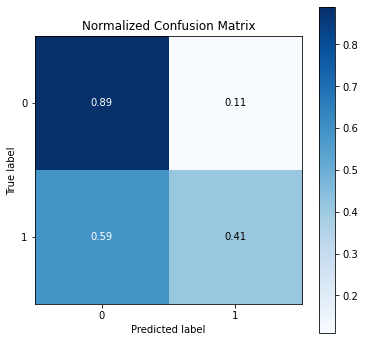

In [29]:
print(classification_report(y_teste, knn_pred))
skplt.metrics.plot_confusion_matrix(y_teste, knn_pred, figsize=(6,6), normalize=True);

Na matriz acima é possível verificar que o modelo é muito bom em prever os casos em que o cliente não abandona o banco, contudo, possui valor baixo de recall para os clientes que abandonaram o banco, 41%. Não sendo o modelo indicado para ser aplicado nessa classificação.

#### Random Forest

In [30]:
rf = RandomForestClassifier(random_state=4)

par_range = {'max_depth': Integer(20, 30),
             'n_estimators': Integer(100, 1000),
             'min_samples_split': Integer(2, 100),
             'min_samples_leaf': Integer(1, 10),
             'max_features': Integer(1, 5)}

cv = StratifiedKFold(n_splits=10, shuffle=True)

rf_otm = BayesSearchCV(rf, par_range, random_state=4, cv=cv, return_train_score=True, scoring='recall', refit=True)
rf_otm.fit(x_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packa

Recall: 0.48


In [31]:
rf_pred = rf_otm.predict(x_teste)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2373
           1       0.76      0.48      0.59       627

    accuracy                           0.86      3000
   macro avg       0.82      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



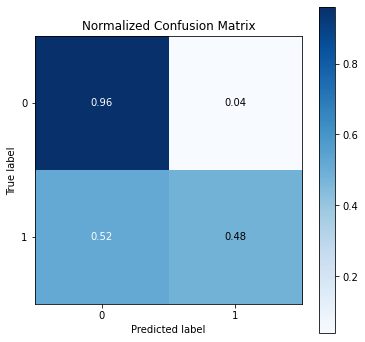

In [32]:
print(classification_report(y_teste, rf_pred))
skplt.metrics.plot_confusion_matrix(y_teste, rf_pred, figsize=(6,6), normalize=True);

Apesar de obter recall melhor que o modelo kNN, o modelo Random Forest ainda possui valor de apenas 48% de acerto para os clientes que realmente abandonaram o banco.

#### XG Boost

In [33]:
xgb = XGBClassifier(random_state=1)

par_range = {'max_depth': Integer(1, 30),
             'learning_rate': Real(1e-3, 1e-1, 'log-uniform'),
             'gamma': Real(0.05, 1.0, 'log-uniform'),
             'min_child_weight': Integer(1, 50),
             'subsample': Real(0.05, 1.0),
             'colsample_bytree': Real(0.06, 1.0)}

cv = StratifiedKFold(n_splits=10, shuffle=True)

xgb_otm = BayesSearchCV(xgb, par_range, random_state=1, cv=cv, return_train_score=True, scoring='recall', refit=True)
xgb_otm.fit(x_treino, y_treino)

Recall: 0.48


In [34]:
xgb_pred = xgb_otm.predict(x_teste)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2373
           1       0.76      0.51      0.61       627

    accuracy                           0.86      3000
   macro avg       0.82      0.73      0.76      3000
weighted avg       0.86      0.86      0.85      3000



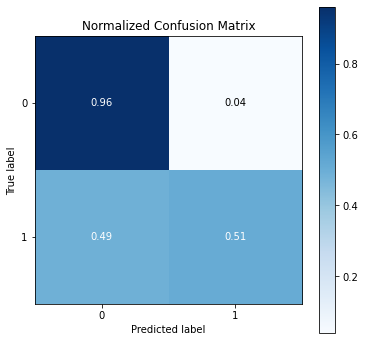

In [35]:
print(classification_report(y_teste, xgb_pred))
skplt.metrics.plot_confusion_matrix(y_teste, xgb_pred, figsize=(6,6), normalize=True);

O modelo XG boost otimizado alcançou recall de 51%, sendo superior ao modelo Random Forest.

Apesar de não possuir um valor satisfatório de previsão de churn, foi o modelo que melhor o previu.

# Entrega Final

A entrega final consiste em aplicar o melhor modelo testado, no arquivo Abandono_teste.csv.

O resultado final deve ser uma planilha com apenas duas colunas, rowNumber e predictedValues

In [39]:
url_teste = 'https://raw.githubusercontent.com/gdomingosg/Desafio_Cientista_de_Dados/main/Abandono_teste.csv'
df_teste = pd.read_csv(url_teste, sep=';')
df_teste.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,10001,15798485,Copley,565,France,Male,31,1,0.00,1,0,1,20443.08
1,10002,15588959,T'ang,569,France,Male,34,4,0.00,1,0,1,4045.90
2,10003,15624896,Ku,669,France,Female,20,7,0.00,2,1,0,128838.67
3,10004,15639629,McConnan,694,France,Male,39,4,173255.48,1,1,1,81293.10
4,10005,15638852,Ts'ui,504,Spain,Male,28,10,109291.36,1,1,1,187593.15


In [41]:
df_teste.set_index('RowNumber', inplace=True)
df_teste.drop(columns=['CustomerId', 'Surname'], inplace=True)

In [42]:
df_teste['Gender'] = df_teste['Gender'].replace(['Female', 'Male'], [0, 1])

teste_cat_tratados = pd.get_dummies(data=df_teste, columns=['Geography', 'NumOfProducts'])
teste_cat_tratados.head(10)

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
RowNumber,,,,,,,,,,,,,,,
10001,565,1,31,1,0.00,0,1,20443.08,1,0,0,1,0,0,0
10002,569,1,34,4,0.00,0,1,4045.90,1,0,0,1,0,0,0
10003,669,0,20,7,0.00,1,0,128838.67,1,0,0,0,1,0,0
10004,694,1,39,4,173255.48,1,1,81293.10,1,0,0,1,0,0,0
10005,504,1,28,10,109291.36,1,1,187593.15,0,0,1,1,0,0,0
10006,776,1,29,4,0.00,0,1,88440.83,1,0,0,0,1,0,0
10007,585,1,25,7,159301.00,1,1,39824.96,1,0,0,1,0,0,0
10008,651,1,24,5,158484.85,1,1,161234.90,0,1,0,1,0,0,0
10009,672,1,45,7,0.00,0,0,174177.96,1,0,0,0,1,0,0


In [43]:
col_numericas = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary', 'Tenure']

In [44]:
teste_cat_tratados[col_numericas] = MinMaxScaler().fit_transform(teste_cat_tratados[col_numericas])
teste_tratados = teste_cat_tratados
teste_tratados.head(10)

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
RowNumber,,,,,,,,,,,,,,,
10001,0.411157,1,0.178082,0.1,0.000000,0,1,0.101298,1,0,0,1,0,0,0
10002,0.419421,1,0.219178,0.4,0.000000,0,1,0.019060,1,0,0,1,0,0,0
10003,0.626033,0,0.027397,0.7,0.000000,1,0,0.644939,1,0,0,0,1,0,0
10004,0.677686,1,0.287671,0.4,0.819096,1,1,0.406481,1,0,0,1,0,0,0
10005,0.285124,1,0.136986,1.0,0.516695,1,1,0.939612,0,0,1,1,0,0,0
10006,0.847107,1,0.150685,0.4,0.000000,0,1,0.442330,1,0,0,0,1,0,0
10007,0.452479,1,0.095890,0.7,0.753124,1,1,0.198504,1,0,0,1,0,0,0
10008,0.588843,1,0.082192,0.5,0.749266,1,1,0.807417,0,1,0,1,0,0,0
10009,0.632231,1,0.369863,0.7,0.000000,0,0,0.872331,1,0,0,0,1,0,0


In [46]:
predictedValues = xgb_otm.predict(teste_tratados)

In [56]:
df_final = pd.DataFrame(predictedValues, columns=['predictedValues'])
df_final.index.name = 'RowNumber'

In [57]:
from google.colab import drive

In [58]:
drive.mount('/drive')

Mounted at /drive


In [60]:
df_final.to_csv('/drive/My Drive/Arquivos google colab/modelo_predicao.csv')